# Classification of Legislations based on Location for E-Cigrattes
# Classification of Insurance rates based on Somker/Non-Smoker User

## ML Assignment 8 : Naive Bayes (Multinomial and Gaussian)

### Course code : CMPE-257
Group name : Spartans <br/>
        Members :
                   * SUDHA AMARNATH
                   * MUKESH RANJAN SAHAY
                   * THIRUMALAI NAMBI DOSS
                   * MUTHU KUMAR SUKUMARAN
                   
                   
### Team Contribution
a. Data preparation and analysing Measure Description - MUTHU KUMAR SUKUMARAN <br/>
b. Data Enrichment and plotting on maps - SUDHA AMARNATH <br/>
c. Data Enrichment using different datasets and correlation - THIRUMALAI NAMBI DOSS <br/> 
d. Apply Naive Bayes algorithm and plotting the result - MUKESH RANJAN SAHAY <br/>


## Naive Bayes

Naive Bayes is among one of the simplest, but most powerful algorithms for classification based on Bayes' Theorem with an assumption of independence among predictors. The Naive Bayes model is easy to build and particularly useful for very large data sets. There are two parts to this algorithm:

* Naive

* Bayes

The Naive Bayes classifier assumes that the presence of a feature in a class is unrelated to any other feature. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that a particular fruit is an apple or an orange or a banana, and that is why it is known as "Naive."


**Bayes Theorem**

In statistics and probability theory, Bayes' theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It serves as a way to figure out conditional probability.

Given a Hypothesis (H) and evidence (E), Bayes' Theorem states that the relationship between the probability of the hypothesis before getting the evidence, P(H), and the probability of the hypothesis after getting the evidence, P(H|E) = P(E|H).P(H)/P(E)

For this reason, P(H) is called the prior probability, while P(H|E) is called the posterior probability. The factor that relates the two, P(H|E)/P(E), is called the likelihood ratio. Using these terms, Bayes' theorem can be rephrased as:

**"The posterior probability equals the prior probability times the likelihood ratio."**


**Objective:**


The purpose of this assignment is to apply the Naive Bayes algorithm to classify the provisions and legislations based on the location.
Also, we are applying the Naive Bayes algorithm on the Insurance and Smoking dataset to classify and predict the insurance rate category depending on the condition if an individual is a tobacco/cigarette user or not.



#### 1.  Data Story 

The STATE System houses current and historical state-level legislative data on tobacco use prevention and control policies. Data are reported on a quarterly basis. Data include information related to state legislation on smokefree indoor air in areas such as: Bars, Commercial Day Care Centers, Government Multi-Unit Housing, Government Worksites, Home-Based Day Care Centers, Hotels and Motels, Personal Vehicles, Private Multi-Unit Housing, Private Worksites, Restaurants, Bingo Halls, Casinos, Enclosed Arenas, Grocery Stores, Hospitals, Hospital Campuses, Malls, Mental Health Outpatient and Residential Facilities, Prisons, Public Transportation, Racetrack Casinos, Substance Abuse Outpatient and Residential Facilities.


As for the vaping trend analysis, we want to know what kinds of provision locations the e-cigarette trend is high for a given province. In this way, we could find where the e-cigarette smoking is banned, allowed of if there are any fines in the province. 

The rate of the health insurance plans offered to the individuals depends on the fact if an individual is a smoker or non-smoker. We are doing the analysis of the plan rates with respect to smokers and non-smokers, age groups.

Following steps are done to arrive at the business conclusion.

1. Identifying your data story with your team
2. Selecting an initial strong data set to conduct all of your homeworks and term long project on.
3. Running linear regression on multiple features (one at a time).
4. Conducting data preparation on the datasets.
5. Conducting data enrichment by adding one or more data sets to your base data set.
6. Using the Naive Bayes to classify the provisions and legislations based on the location. 
7. Using the Naive Bayes to classify and predict the insurance rate category depending on the condition if an individual is a tobacco/cigratte user or not.
8. Business Conclusion


#### 2. Dataset Selection 
### [Google Drive Dataset 1 - Adult-Smoking-Prevalence](https://drive.google.com/open?id=12hFYDopUlP07aLX8dN5UsOnRdJAQ95pg) 
### [Google Drive Dataset 2 - Adult-Tobacco-Prevalence](https://drive.google.com/open?id=1lWwjFFNyNUZjSUHeUB73Rk34iPDA-3n0) 
### [Google Drive Dataset 3 - Insurance Rates](https://drive.google.com/open?id=1B6TzJVc7xWc8UU08cOpx3jneoBcp5J3W) 
### [Google Drive Dataset 3 - Insurance Plan Information](https://drive.google.com/open?id=1oZx16eFDjBQhAhkKRJmUvlYYsLkIKrLJ) 


### Importing Required Libraries

In [0]:
import random
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import Image

from scipy.spatial.distance import cdist
%matplotlib inline

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Load the data set**

In [3]:
# load the CSV file and create a new DataFrame out of it.
file1 = 'CDC_STATE_System_E-Cigarette_Legislation_-_Smokefree_Indoor_Air.csv'
link = 'https://drive.google.com/open?id=1i6qAx5aKxVEJXTXQ1LeOaClY_LryqSW5'
fluff, id = link.split('=')
print('File Name = ', file1)
print('File ID = ', id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file1)  

df = pd.read_csv(file1,low_memory=False)
df = df[df['YEAR'] >= 2017] 
df = df.sample(frac=1)
df = df.head(100000).reset_index(drop=True)
print(df.shape)
origdf = df
df.head(2)




File Name =  CDC_STATE_System_E-Cigarette_Legislation_-_Smokefree_Indoor_Air.csv
File ID =  1i6qAx5aKxVEJXTXQ1LeOaClY_LryqSW5
(98967, 23)


,YEAR,Quarter,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,DataSource,ProvisionGroupDesc,ProvisionDesc,ProvisionValue,Citation,ProvisionAltValue,DataType,Comments,Enacted_Date,Effective_Date,GeoLocation,DisplayOrder,TopicTypeId,TopicId,MeasureId,ProvisionGroupID,ProvisionID
0,2018,3,NJ,New Jersey,Legislation - E-Cigarette - Smokefree Indoor Air,Government Worksites,OSH,Additional Requirements,Minimum Number of Employees Required,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(40.13057004800049, -74.27369128799967)",5,LEG,1042LEG,1003GWK,20GRP,624
1,2018,3,UT,Utah,Legislation - E-Cigarette - Smokefree Indoor Air,Private Worksites,OSH,Additional Requirements,Written Policy Required,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(39.360700171000474, -111.58713063499971)",6,LEG,1042LEG,1006PWK,20GRP,688


### Preparing dataset
Replace the given LocationDesc value with the mapped equivalent, LocationID<br/>
Replace the given ProvisionGroupDesc value with the mapped equivalent, ProvisionGroupID<br/>
Replace the given ProvisionValue value with the mapped equivalent, ProvisionValueID<br/>
Replace the given MeasureDesc value with the mapped equivalent, MeasureDescID<br/>
Replace the given ProvisionDesc value with the mapped equivalent, ProvisionDescID<br/>


In [0]:
def mapLatitudeLongitude(df):
    global latMapping, lonMapping
    lat = []
    lon = []
    for row in df['GeoLocation']:
        try:
            lat.append(row.split(',')[0].strip('('))
            lon.append(row.split(',')[1].strip(')'))
        except:
            lat.append(np.NaN)
            lon.append(np.NaN)
    df['Latitude'] = lat
    df['Longitude'] = lon

    lat = df['Latitude'].unique().tolist()
    lon = df['Longitude'].unique().tolist()
    latMapping = dict( zip(lat,range(len(lat))) )
    lonMapping = dict( zip(lon,range(len(lon))) )

mapLatitudeLongitude(df)    
#print(latMapping)
#print(lonMapping)



In [0]:
def mapLocationID(df):
    global locationIndexList, locAbbrIndexList, latitudeIndexList, longitudeIndexList
    location_id = df['LocationDesc'].unique().tolist()
    mapping = dict( zip(location_id,range(len(location_id))) )
    df.replace({'location_id': mapping},inplace=True)
    LocationID = []
    for row in df['LocationDesc']:
        try:
            LocationID.append(mapping[row.strip()])
        except:
            LocationID.append(np.NaN)
    df['LocationID'] = LocationID

    locationIndexList = list(set(LocationID))
    latitudeIndexList = []
    longitudeIndexList = []
    locAbbrIndexList = []

    for i in locationIndexList:
      latitudeIndexList.append(df.loc[df['LocationID'] == i, 'Latitude'].iloc[0])
      longitudeIndexList.append(df.loc[df['LocationID'] == i, 'Longitude'].iloc[0])
      locAbbrIndexList.append(df.loc[df['LocationID'] == i, 'LocationAbbr'].iloc[0])

    latitudeIndexList = list(np.float_(latitudeIndexList))
    longitudeIndexList = list(np.float_(longitudeIndexList))

mapLocationID(df)

#print(locationIndexList)
#print(locAbbrIndexList)

#print(latitudeIndexList)
#print(longitudeIndexList)


In [0]:
def mapProvisionGroupId(df):
    provision_group_id = df['ProvisionGroupDesc'].unique().tolist()
    mapping = dict( zip(provision_group_id,range(len(provision_group_id))) )
    df.replace({'provision_group_id': mapping},inplace=True)

    ProvisionGroupID = []
    for row in df['ProvisionGroupDesc']:
        try:
            ProvisionGroupID.append(mapping[row.strip()])
        except:
            ProvisionGroupID.append(np.NaN)
    df['ProvisionGroupID'] = ProvisionGroupID
    
mapProvisionGroupId(df)

In [0]:
def mapProvisionValueId(df):
    provision_value_id = df['ProvisionValue'].unique().tolist()
    mapping = dict( zip(provision_value_id,range(len(provision_value_id))) )
    df.replace({'provision_value_id': mapping},inplace=True)

    ProvisionValueID = []
    for row in df['ProvisionValue']:
        try:
            ProvisionValueID.append(mapping[row.strip()])
        except:
            ProvisionValueID.append(np.NaN)
    df['ProvisionValueID'] = ProvisionValueID

mapProvisionValueId(df)

In [0]:
def mapMeasureDescId(df):
    measure_desc_id = df['MeasureDesc'].unique().tolist()
    mapping = dict( zip(measure_desc_id,range(len(measure_desc_id))) )
    df.replace({'measure_desc_id': mapping},inplace=True)

    MeasureDescID = []
    for row in df['MeasureDesc']:
        try:
            MeasureDescID.append(mapping[row.strip()])
        except:
            MeasureDescID.append(np.NaN)
    df['MeasureDescID'] = MeasureDescID

mapMeasureDescId(df)

In [0]:
def mapProvisionDescId(df):

    provision_desc_id = df['ProvisionDesc'].unique().tolist()
    mapping = dict( zip(provision_desc_id,range(len(provision_desc_id))) )
    df.replace({'provision_desc_id': mapping},inplace=True)

    ProvisionDescID = []
    for row in df['ProvisionDesc']:
        try:
            ProvisionDescID.append(mapping[row.strip()])
        except:
            ProvisionDescID.append(np.NaN)
    df['ProvisionDescID'] = ProvisionDescID

mapProvisionDescId(df)

### Remove a row or a column from  dataframe which has a NaN or no values in it.


In [10]:
#ProvisionID is ProvisionDesc
#LocationID is LocationDesc
#ProvisionGroupID is ProvisionGroupDesc
#ProvisionValueID is ProvisionValue
#ProvisionDescID is ProvisionDesc
#MeasureDescID is MeasureDesc

df.dropna(subset = ['ProvisionID', 'LocationID', 'ProvisionGroupID', 'ProvisionValueID', 'MeasureDescID','ProvisionDescID'], inplace = True)
print(df.shape)
df.head(20)

(98967, 29)


,YEAR,Quarter,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,DataSource,ProvisionGroupDesc,ProvisionDesc,ProvisionValue,Citation,ProvisionAltValue,DataType,Comments,Enacted_Date,Effective_Date,GeoLocation,DisplayOrder,TopicTypeId,TopicId,MeasureId,ProvisionGroupID,ProvisionID,Latitude,Longitude,LocationID,ProvisionValueID,MeasureDescID,ProvisionDescID
0,2018,3,NJ,New Jersey,Legislation - E-Cigarette - Smokefree Indoor Air,Government Worksites,OSH,Additional Requirements,Minimum Number of Employees Required,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(40.13057004800049, -74.27369128799967)",5,LEG,1042LEG,1003GWK,0,624,40.13057004800049,-74.27369128799967,0,0,0,0
1,2018,3,UT,Utah,Legislation - E-Cigarette - Smokefree Indoor Air,Private Worksites,OSH,Additional Requirements,Written Policy Required,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(39.360700171000474, -111.58713063499971)",6,LEG,1042LEG,1006PWK,0,688,39.360700171000474,-111.58713063499971,1,0,1,1
2,2018,4,IL,Illinois,Legislation - E-Cigarette - Smokefree Indoor Air,Restaurants,OSH,Restrictions,Type of Restriction in Restaurant (Summary),No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(40.48501028300046, -88.99771017799969)",1,LEG,1042LEG,1007RES,1,700,40.48501028300046,-88.99771017799969,2,0,2,2
3,2018,2,AK,Alaska,Legislation - E-Cigarette - Smokefree Indoor Air,Home-based Day Care Centers,OSH,Vehicles,Type of Restriction in Home-Based Day Care Veh...,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(64.84507995700051, -147.72205903599973)",5,LEG,1042LEG,1009HDC,2,635,64.84507995700051,-147.72205903599973,3,0,3,3
4,2019,3,MN,Minnesota,Legislation - E-Cigarette - Smokefree Indoor Air,Hotels and Motels,OSH,Penalties,Penalty to User,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(46.35564873600049, -94.79420050299967)",13,LEG,1042LEG,1010HNM,3,659,46.35564873600049,-94.79420050299967,4,0,4,4
5,2018,1,DC,District of Columbia,Legislation - E-Cigarette - Smokefree Indoor Air,Hotels and Motels,OSH,Enforcement,Enforcement Authority,Yes,D.C. CODE ANN. § 7-741.02,2,Ranking,NaN,11/18/2016,11/18/2016,"(38.89037138500049, -77.03196112699965)",6,LEG,1042LEG,1010HNM,4,652,38.89037138500049,-77.03196112699965,5,1,4,5
6,2017,2,VA,Virginia,Legislation - E-Cigarette - Smokefree Indoor Air,Private Worksites,OSH,Additional Requirements,Non-Retaliation Provision,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(37.54268067400045, -78.45789046299967)",5,LEG,1042LEG,1006PWK,0,687,37.54268067400045,-78.45789046299967,6,0,1,6
7,2019,2,IL,Illinois,Legislation - E-Cigarette - Smokefree Indoor Air,Hotels and Motels,OSH,Penalties,Penalty to Business (Type),No Provision,NaN,0,NaN,NaN,NaN,NaN,"(40.48501028300046, -88.99771017799969)",10,LEG,1042LEG,1010HNM,3,656,40.48501028300046,-88.99771017799969,2,0,4,7
8,2018,4,MP,Northern Mariana Islands,Legislation - E-Cigarette - Smokefree Indoor Air,Private Multi-Unit Housing,OSH,Penalties,Penalty to Business,Yes,6 CMC § 3183,2,Ranking,NaN,12/28/2016,1/20/2017,"(15.0979, 145.6739)",6,LEG,1042LEG,1005PMH,3,678,15.0979,145.6739,7,1,5,8
9,2018,3,WY,Wyoming,Legislation - E-Cigarette - Smokefree Indoor Air,Hotels and Motels,OSH,Additional Requirements,Maximum Percent of Sleeping Rooms Designated,No Provision,NaN,0,NaN,NaN,NaN,NaN,"(43.23554134300048, -108.10983035299967)",5,LEG,1042LEG,1010HNM,0,651,43.23554134300048,-108.10983035299967,8,0,4,9


### Set cluster data - Create a cluster data frame cdf having columns `LocationID` and `MeasureDescID`


In [11]:

df_col_value_1 = 'LocationID'
df_col_value_2 = 'MeasureDescID'
# create the cluster data frame cdf
cdf = df.loc[:,[df_col_value_1, df_col_value_2]]
cdf.head()



,LocationID,MeasureDescID
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [0]:
def getRowIndex(ndf, ll):
  ndflocList = ndf['LocationID'].tolist()
  return ndflocList.index(ll)


### Bar graph showing the States Location Distribution

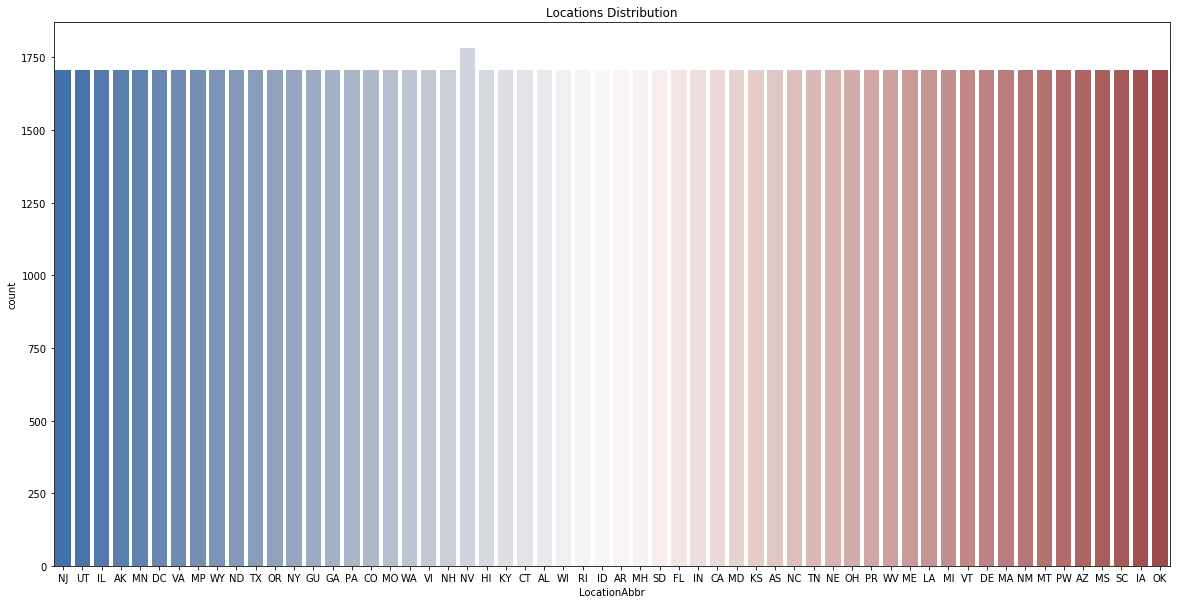

In [13]:
f, ax = plt.subplots(1,1, figsize = (20, 10))
sns.countplot(x=df['LocationAbbr'], ax = ax, palette="vlag")
ax.set_title('Locations Distribution')
plt.show()


### Bar graph showing the number of occurance of the Measure Description Distributions.


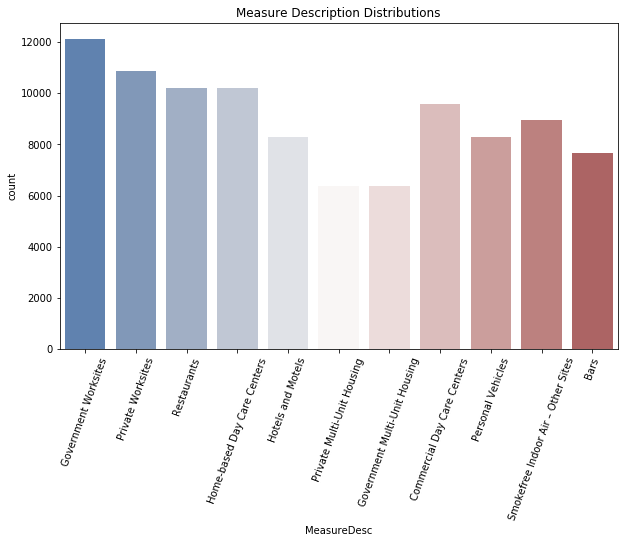

In [14]:
f, ax = plt.subplots(1,1, figsize = (10, 6))
sns.countplot(x=df['MeasureDesc'], ax = ax, palette="vlag")
ax.tick_params('x', rotation = 70)
ax.set_title('Measure Description Distributions')
plt.show()

### Bar graph showing the number of occurance of the Provision Description Distributions.


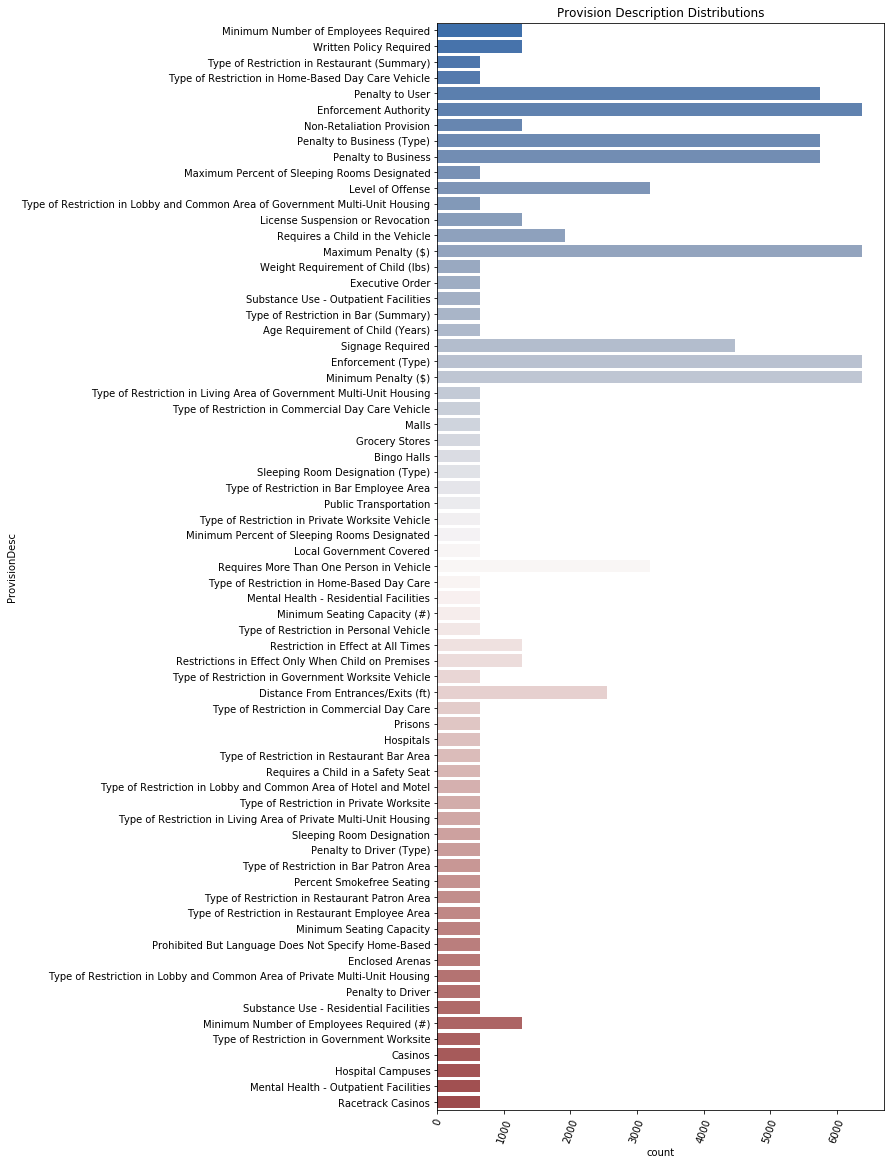

In [15]:
f, ax = plt.subplots(1,1, figsize = (8, 20))
sns.countplot(y=df['ProvisionDesc'], ax = ax, palette="vlag")
ax.tick_params('x', rotation = 70)
ax.set_title('Provision Description Distributions')
plt.show()

### Data Enrichment

In [16]:

rdf = df.groupby(["LocationID", "MeasureDesc"]).size().reset_index(name="Restricted")

indexNames = rdf[(rdf['MeasureDesc'] != "Bars") & (rdf['MeasureDesc'] != "Restaurants") & (rdf['MeasureDesc'] != "Government Worksites") & (rdf['MeasureDesc'] != "Private Worksites")].index
rdf.drop(indexNames , inplace=True)
print(rdf.shape)
print(rdf.head())

bannedList = ['Bars', 'Restaurants', 'Government Worksites', 'Private Worksites']

ndf = pd.DataFrame(rdf.LocationID.unique(), columns =['LocationID'])
for bl in bannedList:
  ndf[bl] = 0

locList = ndf.LocationID.unique().tolist()

for ll in locList:
    for bl in bannedList:
        try:
          val = rdf.loc[(rdf['LocationID'] == ll) & (rdf['MeasureDesc'] == bl), 'Restricted'].values[0]
          rowindex = getRowIndex(ndf, ll)
          if rowindex != -1:
            ndf.set_value(rowindex, bl, val)
          else:
            print(False, ndf.at[ll, 'LocationID'])
        except:
          ndf.set_value(rowindex, bl, 0)

ndf = ndf.fillna(0)
ndf.head()


(232, 3)
    LocationID           MeasureDesc  Restricted
0            0                  Bars         132
3            0  Government Worksites         209
8            0     Private Worksites         187
9            0           Restaurants         176
11           1                  Bars         132


,LocationID,Bars,Restaurants,Government Worksites,Private Worksites
0,0,132,176,209,187
1,1,132,176,209,187
2,2,132,176,209,187
3,3,132,176,209,187
4,4,132,176,209,187


## Pair Plot 

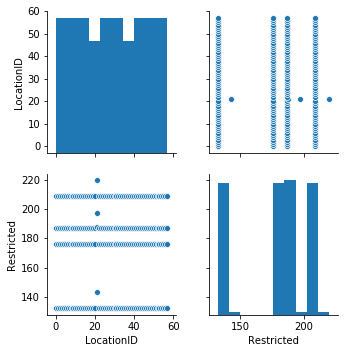

In [17]:
import seaborn as sns #  seaborn package for visualization

# Pairplot to see how data is distrubuted.
g = sns.pairplot(rdf)

### Enrichement with new data set for only Bars, Restaurants and Worksites

In [18]:
for bl in bannedList:        
  ndf[bl] = pd.to_numeric(ndf[bl], errors='ignore')          

ndf['Restricted'] = ndf['Bars'] + ndf['Restaurants'] + ndf['Government Worksites'] + ndf['Private Worksites']

ndf['Latitude'] = ''
ndf['Longitude'] = ''


loc = ndf['LocationID'].unique().tolist()
locMapping = dict( zip(loc,range(len(loc))) )

#print(locationIndexList)
#print(latitudeIndexList)
#print(longitudeIndexList)
#print(locAbbrIndexList)


for ll in locList:
    locidxval = locationIndexList[ll]
    locidxvalndf = locList.index(ll)
    latval = latitudeIndexList[locidxval]
    lonval = longitudeIndexList[locidxval]
    abbval = locAbbrIndexList[locidxval]
    ndf.set_value(locidxvalndf, 'Latitude', latval )
    ndf.set_value(locidxvalndf, 'Longitude', lonval )
    ndf.set_value(locidxvalndf, 'LocationAbbr', abbval )
    
ndf.head(100)

,LocationID,Bars,Restaurants,Government Worksites,Private Worksites,Restricted,Latitude,Longitude,LocationAbbr
0,0,132,176,209,187,704,40.1306,-74.2737,NJ
1,1,132,176,209,187,704,39.3607,-111.587,UT
2,2,132,176,209,187,704,40.485,-88.9977,IL
3,3,132,176,209,187,704,64.8451,-147.722,AK
4,4,132,176,209,187,704,46.3556,-94.7942,MN
5,5,132,176,209,187,704,38.8904,-77.032,DC
6,6,132,176,209,187,704,37.5427,-78.4579,VA
7,7,132,176,209,187,704,15.0979,145.674,MP
8,8,132,176,209,187,704,43.2355,-108.11,WY
9,9,132,176,209,187,704,47.4753,-100.118,ND


### Map Visualization pre enrichment - It only has Bars, Restaurants and Worksites

In [19]:
for col in ndf.columns:
    ndf[col] = ndf[col].astype(str)

ndf['text'] = ndf['LocationAbbr'] + '<br>' + \
    'Bars: ' + ndf['Bars'] + '<br>' + 'Restaurants: ' + ndf['Restaurants'] + '<br>' + \
    'Government Worksites: ' + ndf['Government Worksites'] + '<br>' + 'Private Worksites: ' + ndf['Private Worksites'] + '<br>'

fig = go.Figure(data=go.Choropleth(
    locations=ndf['LocationAbbr'],
    z=ndf['Restricted'].astype(float),
    locationmode='USA-states',
    colorscale='Earth',
    zmin = min(ndf['Restricted'].astype(float)) - 0,
    zmax = max(ndf['Restricted'].astype(float)),
    autocolorscale=False,
    text=ndf['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Restricted"
))

fig.update_layout(
    title_text='Comprehensive = Restricted in worksites, restaurants, and bars as of Q3 2019.<br>(Hover for breakdown)',
    autosize=False,
    width=1200,
    height=800,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

### Data Enrichement - to merge Two data sets

In [20]:

file2 = 'CDC_STATE_System_E-Cigarette_Legislation_-_Smokefree_Campus.csv'
link = 'https://drive.google.com/open?id=1SFMMrd4fL4J-l_bTiDtBUzMVDHqcdfok'
fluff, id = link.split('=')
print('File Name = ', file2)
print('File ID = ', id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file2)  

sf = pd.read_csv(file2,low_memory=False)
sf = sf[sf['YEAR'] >= 2017] 
sf = sf.sample(frac=1)
sf = sf.head(100000).reset_index(drop=True)
print(sf.corrwith(origdf, axis = 1))
df = pd.concat([origdf, sf])

print(sf.shape)
print(df.shape)

# Create indices for df
mapLatitudeLongitude(df)    
mapLocationID(df)
mapProvisionGroupId(df)
mapProvisionValueId(df)
mapMeasureDescId(df)
mapProvisionDescId(df)

df.head(5)


File Name =  CDC_STATE_System_E-Cigarette_Legislation_-_Smokefree_Campus.csv
File ID =  1SFMMrd4fL4J-l_bTiDtBUzMVDHqcdfok
0        0.998761
1        0.996915
2        0.997101
3        0.999497
4        0.998763
5        0.999239
6        0.997051
7        0.998627
8        0.998550
9        0.999062
10       0.998530
11       0.999736
12       0.999896
13       0.997716
14       0.998578
15       0.997772
16       0.998621
17       0.999322
18       0.995361
19       0.999842
20       0.997749
21       0.999263
22       0.998917
23       0.999435
24       0.999271
25       0.999435
26       0.999176
27       0.997865
28       0.999820
29       0.996255
           ...   
98937         NaN
98938         NaN
98939         NaN
98940         NaN
98941         NaN
98942         NaN
98943         NaN
98944         NaN
98945         NaN
98946         NaN
98947         NaN
98948         NaN
98949         NaN
98950         NaN
98951         NaN
98952         NaN
98953         NaN
98954         

,Citation,Comments,DataSource,DataType,DisplayOrder,Effective_Date,Enacted_Date,GeoLocation,Latitude,LocationAbbr,LocationDesc,LocationID,Longitude,MeasureDesc,MeasureDescID,MeasureId,ProvisionAltValue,ProvisionDesc,ProvisionDescID,ProvisionGroupDesc,ProvisionGroupID,ProvisionID,ProvisionValue,ProvisionValueID,Quarter,TopicDesc,TopicId,TopicTypeId,YEAR
0,NaN,NaN,OSH,Ranking,5,NaN,NaN,"(40.13057004800049, -74.27369128799967)",40.13057004800049,NJ,New Jersey,0,-74.27369128799967,Government Worksites,0,1003GWK,0,Minimum Number of Employees Required,0,Additional Requirements,0,624,No Provision,0,3,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2018
1,NaN,NaN,OSH,Ranking,6,NaN,NaN,"(39.360700171000474, -111.58713063499971)",39.360700171000474,UT,Utah,1,-111.58713063499971,Private Worksites,1,1006PWK,0,Written Policy Required,1,Additional Requirements,0,688,No Provision,0,3,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2018
2,NaN,NaN,OSH,Ranking,1,NaN,NaN,"(40.48501028300046, -88.99771017799969)",40.48501028300046,IL,Illinois,2,-88.99771017799969,Restaurants,2,1007RES,0,Type of Restriction in Restaurant (Summary),2,Restrictions,1,700,No Provision,0,4,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2018
3,NaN,NaN,OSH,Ranking,5,NaN,NaN,"(64.84507995700051, -147.72205903599973)",64.84507995700051,AK,Alaska,3,-147.72205903599973,Home-based Day Care Centers,3,1009HDC,0,Type of Restriction in Home-Based Day Care Veh...,3,Vehicles,2,635,No Provision,0,2,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2018
4,NaN,NaN,OSH,Ranking,13,NaN,NaN,"(46.35564873600049, -94.79420050299967)",46.35564873600049,MN,Minnesota,4,-94.79420050299967,Hotels and Motels,4,1010HNM,0,Penalty to User,4,Penalties,3,659,No Provision,0,3,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2019


### Correlation map for the data frame columns

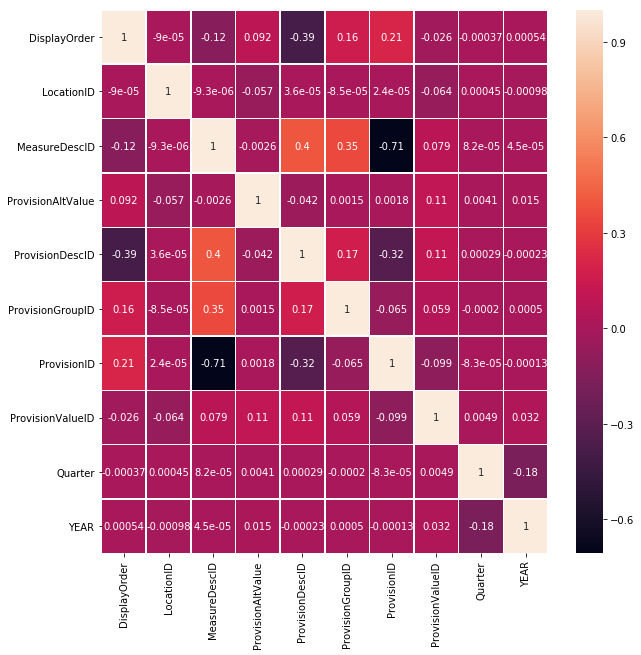

In [21]:

Cor = df[df.columns] 
#Calculate the correlation of the above variables
cor = Cor.corr() 
 #Plot the correlation as heat map
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cor,annot=True,linewidths=.5, ax=ax)

### Post Data Enrichment: Bar Graph showing Messure Description (It includes Public and Private Schools now)

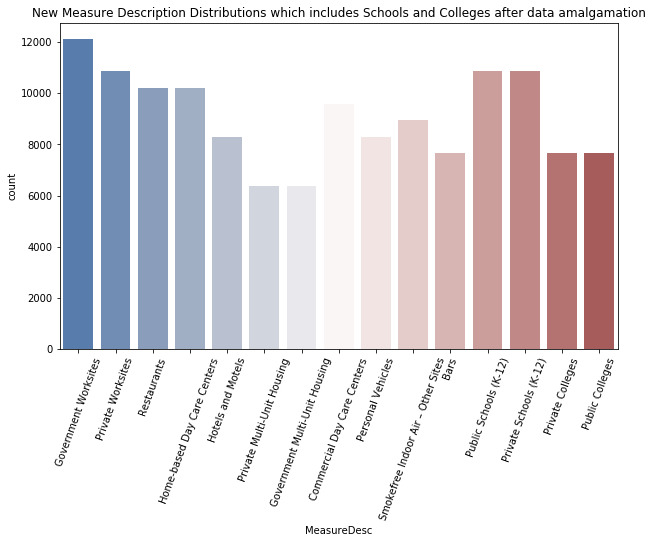

In [22]:
f, ax = plt.subplots(1,1, figsize = (10, 6))
sns.countplot(x=df['MeasureDesc'], ax = ax, palette="vlag")
ax.tick_params('x', rotation = 70)
ax.set_title('New Measure Description Distributions which includes Schools and Colleges after data amalgamation')
plt.show()

### Data Enrichment

In [23]:

rdf = df.groupby(["LocationID", "MeasureDesc"]).size().reset_index(name="Restricted")

indexNames = rdf[(rdf['MeasureDesc'] != "Bars") & \
                 (rdf['MeasureDesc'] != "Restaurants") & \
                 (rdf['MeasureDesc'] != "Government Worksites") & \
                 (rdf['MeasureDesc'] != "Private Worksites") & \
                 (rdf['MeasureDesc'] != "Public Colleges") & \
                 (rdf['MeasureDesc'] != "Private Colleges") & \
                 (rdf['MeasureDesc'] != "Private Schools (K-12)") & \
                 (rdf['MeasureDesc'] != "Public Schools (K-12)")].index
rdf.drop(indexNames , inplace=True)
print(rdf.shape)
print(rdf.head(8))

bannedList = ['Bars', 'Restaurants', 'Government Worksites', 'Private Worksites', \
              'Public Colleges', 'Public Schools (K-12)', 'Private Colleges', 'Private Schools (K-12)']

ndf = pd.DataFrame(rdf.LocationID.unique(), columns =['LocationID'])
for bl in bannedList:
  ndf[bl] = 0

locList = ndf.LocationID.unique().tolist()

for ll in locList:
    for bl in bannedList:
        try:
          val = rdf.loc[(rdf['LocationID'] == ll) & (rdf['MeasureDesc'] == bl), 'Restricted'].values[0]
          rowindex = getRowIndex(ndf, ll)
          if rowindex != -1:
            ndf.set_value(rowindex, bl, val)
          else:
            print(False, ndf.at[ll, 'LocationID'])
        except:
          ndf.set_value(rowindex, bl, 0)

ndf = ndf.fillna(0)

print('\nNew NDF data structure includes all Public and Private Schools along with Bars, Restaurants, Worksites\n')
ndf.head()

(464, 3)
    LocationID             MeasureDesc  Restricted
0            0                    Bars         132
3            0    Government Worksites         209
7            0        Private Colleges         132
9            0  Private Schools (K-12)         187
10           0       Private Worksites         187
11           0         Public Colleges         132
12           0   Public Schools (K-12)         187
13           0             Restaurants         176

New NDF data structure includes all Public and Private Schools along with Bars, Restaurants, Worksites



,LocationID,Bars,Restaurants,Government Worksites,Private Worksites,Public Colleges,Public Schools (K-12),Private Colleges,Private Schools (K-12)
0,0,132,176,209,187,132,187,132,187
1,1,132,176,209,187,132,187,132,187
2,2,132,176,209,187,132,187,132,187
3,3,132,176,209,187,132,187,132,187
4,4,132,176,209,187,132,187,132,187


### Total Restricted count of Bars, Restaurants, Worksites and Scools are calculated - post enrichment

In [24]:
for bl in bannedList:        
  ndf[bl] = pd.to_numeric(ndf[bl], errors='ignore')          

bannedList = ['Bars', 'Restaurants', 'Government Worksites', 'Private Worksites', \
              'Public Colleges', 'Public Schools (K-12)', 'Private Colleges', 'Private Schools (K-12)']

ndf['RestrictedAdults'] = ndf['Bars'] + ndf['Restaurants'] + ndf['Government Worksites'] + ndf['Private Worksites']
ndf['RestrictedYouth'] = ndf['Public Colleges'] + ndf['Public Schools (K-12)'] + ndf['Private Colleges'] + ndf['Private Schools (K-12)']

ndf['RestrictedTotal'] = ndf['RestrictedAdults'] + ndf['RestrictedYouth']

ndf['Latitude'] = ''
ndf['Longitude'] = ''

loc = ndf['LocationID'].unique().tolist()
locMapping = dict( zip(loc,range(len(loc))) )

for ll in locList:
    locidxval = locationIndexList[ll]
    locidxvalndf = locList.index(ll)
    latval = latitudeIndexList[locidxval]
    lonval = longitudeIndexList[locidxval]
    abbval = locAbbrIndexList[locidxval]
    ndf.set_value(locidxvalndf, 'Latitude', latval )
    ndf.set_value(locidxvalndf, 'Longitude', lonval )
    ndf.set_value(locidxvalndf, 'LocationAbbr', abbval )
    
ndf.head(5)

,LocationID,Bars,Restaurants,Government Worksites,Private Worksites,Public Colleges,Public Schools (K-12),Private Colleges,Private Schools (K-12),RestrictedAdults,RestrictedYouth,RestrictedTotal,Latitude,Longitude,LocationAbbr
0,0,132,176,209,187,132,187,132,187,704,638,1342,40.1306,-74.2737,NJ
1,1,132,176,209,187,132,187,132,187,704,638,1342,39.3607,-111.587,UT
2,2,132,176,209,187,132,187,132,187,704,638,1342,40.485,-88.9977,IL
3,3,132,176,209,187,132,187,132,187,704,638,1342,64.8451,-147.722,AK
4,4,132,176,209,187,132,187,132,187,704,638,1342,46.3556,-94.7942,MN


### Comprehensive = Total Restricted in worksites, restaurants, bars and schools as of Q3 2019 Interactive Map Plot

In [25]:
for col in ndf.columns:
    ndf[col] = ndf[col].astype(str)

ndf['text'] = ndf['LocationAbbr'] + '<br>' + \
    'Bars: ' + ndf['Bars'] + '<br>' + \
    'Restaurants: ' + ndf['Restaurants'] + '<br>' + \
    'Government Worksites: ' + ndf['Government Worksites'] + '<br>' + \
    'Private Worksites: ' + ndf['Private Worksites'] + '<br>' + \
    'Private Schools (K-12): ' + ndf['Private Schools (K-12)'] + '<br>' + \
    'Public Schools (K-12): ' + ndf['Public Schools (K-12)'] + '<br>' + \
    'Private Colleges: ' + ndf['Private Colleges'] + '<br>' + \
    'Public Colleges: ' + ndf['Public Colleges'] + '<br>'

fig = go.Figure(data=go.Choropleth(
    locations=ndf['LocationAbbr'],
    z=ndf['RestrictedTotal'].astype(float),
    locationmode='USA-states',
    colorscale='Earth',
    zmin = min(ndf['RestrictedTotal'].astype(float)) - 0,
    zmax = max(ndf['RestrictedTotal'].astype(float)),
    autocolorscale=False,
    text=ndf['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="RestrictedTotal"
))

fig.update_layout(
    title_text='Comprehensive = Restricted in worksites, restaurants, bars and schools as of Q3 2019.<br>(Hover for breakdown)',
    autosize=False,
    width=1200,
    height=800,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

## Splitting Data into Training and Test Sets

In [26]:
df_final = df.loc[:,['LocationID','MeasureDescID','ProvisionAltValue','ProvisionDescID','ProvisionGroupID','ProvisionID','ProvisionValueID','YEAR']]
df_final.head(20)


df_final.dtypes

LocationID           int64
MeasureDescID        int64
ProvisionAltValue    int64
ProvisionDescID      int64
ProvisionGroupID     int64
ProvisionID          int64
ProvisionValueID     int64
YEAR                 int64
dtype: object

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import train_test_split

# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(df[['LocationID']], df['ProvisionAltValue'], test_size=0.1, random_state=69)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(122409, 1)
(122409,)
(13602, 1)
(13602,)


# Naive Bayes Classifier 

**Create the Multinomial Naive Bayes Model**

In [0]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

**Apply prediction on test data and get accuracy**

In [30]:
predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

0.8699455962358477


In [31]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))

[[11833     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [   66     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [  895     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [   35     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [  494     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]

**Conclusion**

Naive Bayes Classifier is used for classification tasks. With the current solution we used Multinomial Naive Bayes classification task, which gives the different Provisions based on the location with an accuracy of 86.71%.

# Analysis of the Insurance data and using Naive Bayes to classify the rates for Somker/Non-Smoker

**Load the data set**

In [32]:
# load the CSV file and create a new DataFrame out of it.
file3 = 'Rate.csv'
link = 'https://drive.google.com/open?id=1B6TzJVc7xWc8UU08cOpx3jneoBcp5J3W'
fluff, id = link.split('=')
print('File Name = ', file3)
print('File ID = ', id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file3)  

df = pd.read_csv(file3,low_memory=False)
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

df = df.sample(frac=1)
df = df.head(100000).reset_index(drop=True)
print(df.shape)
origdfRate = df
df.head(2)

File Name =  Rate.csv
File ID =  1B6TzJVc7xWc8UU08cOpx3jneoBcp5J3W
(100000, 24)


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2016,MT,23603,SERFF,14,2015-10-21 17:48:08,23603,93-0245545,2016-01-01,2016-03-31,23603MT0180033,Rating Area 3,No Preference,25,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2319
1,2016,OR,39424,SERFF,4,2015-08-20 12:28:36,39424,93-0989307,2016-01-01,2016-12-31,39424OR1260002,Rating Area 2,No Preference,0-20,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1348


From the complete data ,we are more interested in columns below after looking at the data.

BusinessYear, StateCode, Age, PlanId, IndividualRate, IndividualTobaccoRate and all the family/couple rates. 
Data is further broke down into individual U.S. states:

In [33]:
states = df["StateCode"].value_counts()
plans = df["PlanId"].value_counts()
states
no_of_states = len(states)
no_of_plans = len(plans)
no_of_states, no_of_plans

(39, 12586)

**Observations from above breakdown:**
* Number of states for which data is present: 39 states
* Number of health insurance plans: 16808 
* From the states data,is clear that not all states make use of the federal network healthcare.gov. 
as some states have their own health insurance marketplace eg: NY 
* Some states offer significantly more plans than others. This may be due to the different sizes of the states
and not all states have offered plans through healthcare.gov in for all  three years.

## Data cleaning -The most Important step before further analysis and plotting 

Clean-up step includes typos, non-sensical unique values, NaN' values.
Identifying unique values in the columns that contain categories to see if there are any strange values:

In [34]:
df['Age'].unique() 

array(['25', '0-20', '57', '37', '33', '65 and over', '24', '40', '41',
       '21', '54', '62', '50', '30', '60', '64', '46', '48', '26', '29',
       '32', '28', '42', '52', '56', '35', '45', '22', '55', '43', '39',
       '38', '51', '31', '58', 'Family Option', '36', '49', '63', '34',
       '23', '47', '61', '59', '44', '27', '53'], dtype=object)

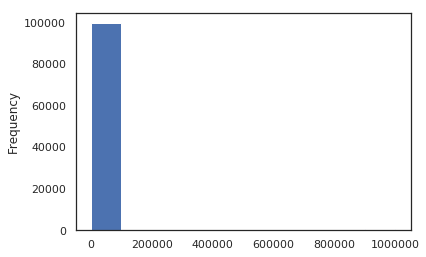

In [35]:
df['IndividualRate'].plot.hist()

There is a problem with individual rates. Sorting the values further using this column.Fixing the 0, 999999, etc, entries by specifying a list of NaN values before reading in the CSV file. We can also leave out some of the columns to save memory.

In [0]:
df.sort_values(by='IndividualRate') 
na_values = ['NaN', 'N/A', '0', '0.01', '9999', '9999.99', '999999']
df = pd.read_csv("Rate.csv", na_values=na_values, usecols=['BusinessYear', 'StateCode', 'PlanId', 'RatingAreaId','Tobacco', 'Age', 'IndividualRate','IndividualTobaccoRate','Couple', 'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents', 'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent', 'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents'])

Now we should get rid of duplicates within this reduced dataframe:

In [37]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(12442241, 15)

**Analysis**: The raw dataset was quite clean already. Only about 250,000 rows in the dataframe contained (for our purposes) redundant data.

For the further analysis,I will focus on 15 of the 24 columns.

## More data cleaning based on a first in-depth look at the data with some basic plots

The data covers three consecutive years. Let's see how the years compare.

In [38]:
df["BusinessYear"].value_counts()

2015    4585265
2016    4180939
2014    3676037
Name: BusinessYear, dtype: int64

The data seems to be more or less evenly distributed over the three years. Let's have a look at trends over the years.

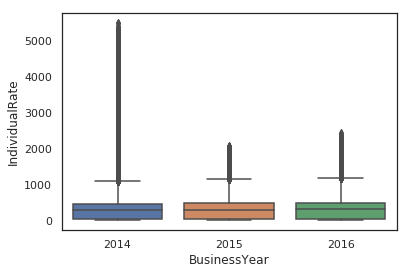

In [39]:
sns.boxplot(x="BusinessYear", y="IndividualRate", data=df)

**Observation 1**
Looking at the end data in 2014,these outliers make the boxchart unreadable. Need to break it down by states to narrow down the outliers.

In [0]:
Statelist = df['StateCode'].unique()
Statelist = np.sort(Statelist)

Now with this sorted list of state names, drawing boxplot for all 34 states.

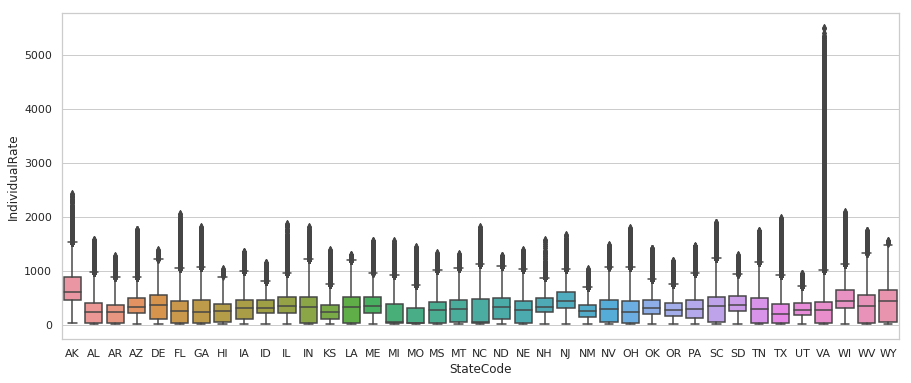

In [41]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df, order=Statelist)

**Observation2** Virginia is the one state that's causing the outliers in the 2014 statistics. Taking look at VA in 2014 in more detail.

*** Analysing  the case of Virginia Further ***

In [0]:
df2014 = df[df['BusinessYear'].isin([2014])].copy()
df2015 = df[df['BusinessYear'].isin([2015])].copy()
df2016 = df[df['BusinessYear'].isin([2016])].copy()

In [43]:
df2014.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,3676037.0,3.549143e+06,1.601995e+06,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000,9078.000000
mean,2014.0,3.174200e+02,5.601592e+02,48.318870,48.799154,68.371658,92.581684,71.081461,90.425835,114.622133
std,0.0,2.876297e+02,3.345296e+02,19.841312,18.060111,29.339670,45.725490,30.832572,42.059903,58.095334
min,2014.0,6.000000e+00,5.566000e+01,10.000000,10.000000,22.000000,22.000000,22.000000,22.000000,22.000000
25%,2014.0,3.288000e+01,3.412000e+02,31.570000,33.590000,44.460000,53.670000,48.452500,61.860000,73.900000
50%,2014.0,2.937000e+02,4.759600e+02,46.355000,47.735000,69.485000,96.300000,71.330000,93.490000,119.640000
75%,2014.0,4.609400e+02,6.953100e+02,60.360000,60.360000,87.470000,121.387500,90.937500,117.405000,151.345000
max,2014.0,5.503850e+03,6.604610e+03,182.400000,169.650000,248.110000,357.940000,260.850000,339.310000,449.140000


The 2014 data looks similar to the 2014-1016 dataset. But with just 1/3 of the rows it's much easier to handle.

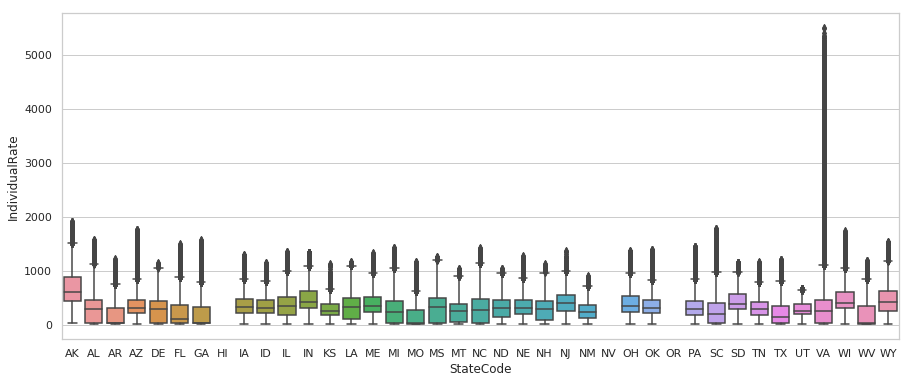

In [44]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.boxplot(x="StateCode", y="IndividualRate", data=df2014, order=Statelist)

I have created a separate Virginia 2014 dataframe to get more detailing of Virgina Case

In [0]:
df2014_va = df2014[df2014['StateCode'].isin(['VA'])].copy()

In [46]:
df2014_va.shape

(119574, 15)

In [47]:
df2014_va.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,119574.0,115254.000000,61318.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2014.0,396.495291,768.124408,46.957630,48.706185,63.087185,79.605333,67.665704,82.046667,98.564593
std,0.0,613.186797,863.353308,17.501699,20.158233,28.306539,40.991590,34.949403,43.313799,55.020378
min,2014.0,10.010000,63.390000,25.350000,25.350000,25.350000,25.350000,25.350000,25.350000,25.350000
25%,2014.0,31.840000,335.602500,31.180000,31.180000,31.180000,31.180000,31.180000,31.180000,31.180000
50%,2014.0,256.845000,473.315000,47.760000,47.370000,70.100000,91.605000,71.315000,94.760000,117.590000
75%,2014.0,460.087500,768.180000,59.290000,60.895000,85.370000,111.625000,92.137500,117.012500,141.272500
max,2014.0,5503.850000,6604.610000,86.750000,107.170000,112.280000,149.040000,151.120000,151.120000,187.810000


Maybe the very high rates are for old individuals. I plot the plan costs by category 'Age' to see how prices compare across the individuals' ages. 
I have to exclude the "Family Option" rates first, since they are also a category of the 'Age' column.

In [48]:
exclude_list = df2014_va['Age'].isin(['Family Option'])
df2014_va_wofamily = df2014_va[~exclude_list]
age_labels = df2014_va_wofamily['Age'].unique()
age_labels = ['65+' if x=='65 and over' else x for x in age_labels]  #replace label '65 and over' with '65+' for plot labels
len(age_labels), age_labels

(46,
 ['0-20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65+'])

Creating  boxplot for each age group.

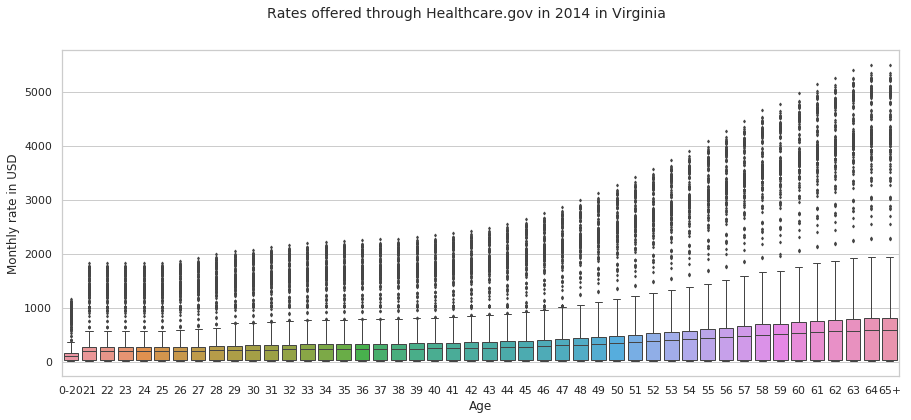

In [49]:
fig = plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

fig.suptitle('Rates offered through Healthcare.gov in 2014 in Virginia', fontsize=14)

ax = sns.boxplot(x="Age", y="IndividualRate", data=df2014_va_wofamily, linewidth=1.0, fliersize=2.0)
ax.set_ylabel("Monthly rate in USD")

# Customize x tick lables
xticks = np.arange(46)
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(age_labels)

plt.savefig('Virginia_rates_by_age.png', bbox_inches='tight', dpi=150)

**Observation 3** The large spread in premiums in Virginia is real. After some internet research it turns out that the wide range in monthly premiums in Virginia is due to plans covering gastric bypasses! In all other states, this type of surgery is covered by all plans, so the cost for these surgeries is distributed among all payees (http://www.webmd.com/health-insurance/20131011/why-some-virginia-health-plans-cost-so-much).

We will take another case of Montana where there are really low premiums.

### The case of Montana

Creating df for Montana 2014 to ease the exploration process

In [0]:
df2014_mo = df2014[df2014['StateCode'].isin(['MO'])].copy()

Montana seem to have a large number of plans with rates <$100. Let's look at a histogram:

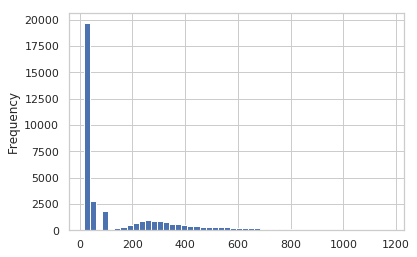

In [51]:
df2014_mo['IndividualRate'].plot.hist(50)

These low-cost plans make up the majority of plans, actually.

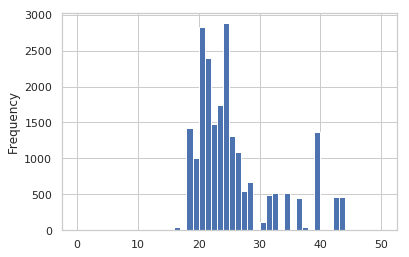

In [52]:
df2014_mo['IndividualRate'].plot.hist(50, range=(0, 50))

*** A summary of the Montana 2014 dataframe ***

In [53]:
df2014_mo.describe()

,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,40618.0,37018.000000,12512.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2014.0,157.784407,483.698700,49.273913,50.552304,72.199000,99.969522,76.618478,98.264826,126.035652
std,0.0,207.228153,234.649054,11.172008,10.261092,16.476146,29.757290,15.987663,20.807315,32.921070
min,2014.0,16.140000,68.220000,32.280000,31.760000,44.350000,44.350000,47.900000,63.510000,70.210000
25%,2014.0,23.190000,314.490000,40.555000,43.200000,60.295000,79.712500,64.912500,82.810000,101.420000
50%,2014.0,32.050000,418.125000,48.610000,50.170000,70.475000,100.670000,75.050000,96.050000,123.935000
75%,2014.0,265.477500,608.855000,55.130000,56.425000,82.935000,116.547500,85.395000,110.420000,143.427500
max,2014.0,1170.570000,1463.190000,80.970000,80.160000,119.880000,179.450000,120.680000,160.400000,219.980000


**Observation 4** It's interesting that all couple/family plans have a price range comparable to the low-price bump in the individual rates.

In [54]:
df2014_mo.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
1289292,2014,MO,29416MO0010001,Rating Area 1,No Preference,0-20,24.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289293,2014,MO,29416MO0010002,Rating Area 1,No Preference,0-20,20.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289294,2014,MO,29416MO0020001,Rating Area 1,No Preference,0-20,30.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289295,2014,MO,29416MO0020002,Rating Area 1,No Preference,0-20,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289296,2014,MO,29416MO0010003,Rating Area 1,No Preference,Family Option,26.37,NaN,52.74,50.89,75.42,109.75,77.26,101.79,136.12


**Observation 5** The low-cost plans are actually dental-only plans. Excluding them if we want to say anything about health insurance premiums.We can read in another CSV file that can give us some insights on which is which.

### Distinguishing between full plans and dental-only plans

The CSV file PlanAttributes.csv contains benefits, copays, deductibles and many more details of the individual health insurance plans. The file also lists full health insurance plans and dental-only plans. This is what we have to use to clean our dataset.

In [55]:
# load the CSV file and create a new DataFrame out of it.
file4 = 'PlanAttributes.csv'
link = 'https://drive.google.com/open?id=1oZx16eFDjBQhAhkKRJmUvlYYsLkIKrLJ'
fluff, id = link.split('=')
print('File Name = ', file4)
print('File ID = ', id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file4)  

na_values = ['NaN', 'N/A', '0', '']
dental = pd.read_csv(file4, na_values=na_values)

File Name =  PlanAttributes.csv
File ID =  1oZx16eFDjBQhAhkKRJmUvlYYsLkIKrLJ


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.



In [56]:
dental.head()

,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,DEHBCombInnOonFamilyPerGroupMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonIndividualMOOP,DEHBDedCombInnOonFamily,DEHBDedCombInnOonFamilyPerGroup,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonIndividual,DEHBDedInnTier1Coinsurance,DEHBDedInnTier1Family,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1Individual,DEHBDedInnTier2Coinsurance,DEHBDedInnTier2Family,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2Individual,DEHBDedOutOfNetFamily,DEHBDedOutOfNetFamilyPerGroup,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetIndividual,DEHBInnTier1FamilyMOOP,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier2FamilyMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2IndividualMOOP,DEHBOutOfNetFamilyMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetIndividualMOOP,DentalOnlyPlan,DiseaseManagementProgramsOffered,EHBPediatricDentalApportionmentQuantity,EHBPercentPremiumS4,EHBPercentTotalPremium,FirstTierUtilization,FormularyId,FormularyURL,HIOSProductId,HPID,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,ImportDate,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,InpatientCopaymentMaximumDays,IsGuaranteedRate,IsHSAEligible,IsNewPlan,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,IssuerActuarialValue,IssuerId,IssuerId2,MEHBCombInnOonFamilyMOOP,MEHBCombInnOonFamilyPerGroupMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonIndividualMOOP,MEHBDedCombInnOonFamily,MEHBDedCombInnOonFamilyPerGroup,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonIndividual,MEHBDedInnTier1Coinsurance,MEHBDedInnTier1Family,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1Individual,MEHBDedInnTier2Coinsurance,MEHBDedInnTier2Family,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2Individual,MEHBDedOutOfNetFamily,MEHBDedOutOfNetFamilyPerGroup,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetIndividual,MEHBInnTier1FamilyMOOP,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1IndividualMOOP,MEHBInnTier2FamilyMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2IndividualMOOP,MEHBOutOfNetFamilyMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetIndividualMOOP,MarketCoverage,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MetalLevel,MultipleInNetworkTiers,NationalNetwork,NetworkId,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,PlanBrochure,PlanEffictiveDate,PlanExpirationDate,PlanId,PlanLevelExclusions,PlanMarketingName,PlanType,QHPNonQHPTypeId,RowNumber,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesCopayment,SBCHavingDiabetesDeductible,SBCHavingDiabetesLimit,SBCHavingaBabyCoinsurance,SBCHavingaBabyCopayment,SBCHavingaBabyDeductible,SBCHavingaBabyLimit,SecondTierUtilization,ServiceAreaId,SourceName,SpecialistRequiringReferral,SpecialtyDrugMaximumCoinsurance,StandardComponentId,StateCode,StateCode2,TEHBCombInnOonFamilyMOOP,TEHBCombInnOonFamilyPerGroupMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonIndividualMOOP,TEHBDedCombInnOonFamily,TEHBDedCombInnOonFamilyPerGroup,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonIndividual,TEHBDedInnTier1Coinsurance,TEHBDedInnTier1Family,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1Individual,TEHBDedInnTier2Coinsurance,TEHBDedInnTier2Family,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2Individual,TEHBDedOutOfNetFamily,TEHBDedOutOfNetFamilyPerGroup,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutO

Well, this is a big messy dataframe. We are only interested in the column DentalOnlyPlan. Let's have a look at it:

In [57]:
dental['DentalOnlyPlan'].unique()

array(['Yes', 'No'], dtype=object)

This  one is clean!

In [58]:
len(dental['HIOSProductId'].unique())
len(df['PlanId'].unique())

16808

These PlanId's from the Rate.csv file are not exactly the same as the HIOSProductId's from the PlanAttributes.csv file. The format is similar: 29416MO0010001 versus 21989AK002. I can try to strip the last four digits from the PlanId's to see if the number of PlanId's and HIOSProductId's matches then.

In [59]:
Ids = df.PlanId
mod_Ids = [x[:-4] for x in Ids]
len(set(mod_Ids))

3498

There is one more element in the modified PlanId list than in the dental list. Let's find it.

In [60]:
set(mod_Ids)-set(dental['HIOSProductId'].unique())

{'19312TZ001'}

TZ is not a valid State abbreviation. There's a plan in Texas with name 19312TX001, though. So let's change this typo.

In [61]:
mod_Ids = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids]
set(mod_Ids)-set(dental['HIOSProductId'].unique())

set()

Now adding these new labels as a new column to the original dataframe and then merge the dental dataframe.

In [0]:
df.loc[:,'HIOSProductId'] = pd.Series(mod_Ids, index=df.index)

In [63]:
df.shape

(12442241, 16)

Success. Now doing this for the dfs of the individual three years

In [0]:
Ids_2014 = df2014.PlanId
mod_Ids_2014 = [x[:-4] for x in Ids_2014]
Ids_2015 = df2015.PlanId
mod_Ids_2015 = [x[:-4] for x in Ids_2015]
Ids_2016 = df2016.PlanId
mod_Ids_2016 = [x[:-4] for x in Ids_2016]

In [0]:
mod_Ids_2014 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2014]
mod_Ids_2015 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2015]
mod_Ids_2016 = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_2016]

In [0]:
df2014.loc[:,'HIOSProductId'] = mod_Ids_2014
df2015.loc[:,'HIOSProductId'] = mod_Ids_2015
df2016.loc[:,'HIOSProductId'] = mod_Ids_2016

In [67]:
len(set(df2014['HIOSProductId']))

1836

Creating a diet version of the dental DataFrame before we merge it with the dfs. We only need the DentalOnlyPlan column.

In [68]:
dental_diet = dental[['HIOSProductId', 'DentalOnlyPlan']].copy()
dental_diet.shape

(77353, 2)

In [69]:
dental_diet.head()

,HIOSProductId,DentalOnlyPlan
0,21989AK002,Yes
1,21989AK002,Yes
2,21989AK002,Yes
3,21989AK001,Yes
4,21989AK001,Yes


In [70]:
dental_diet['DentalOnlyPlan'].value_counts()

No     65704
Yes    11649
Name: DentalOnlyPlan, dtype: int64

Merging two dataframes can be a bit tricky. Since it is likely that we will have to try several times until it works the way we imagine them to be merged, we should test the merging process on a smaller df first. Let's use the 2014 df.

Now, not all the PlanId's are in the 2014 df. If we merge the full dental df with the 2014 df, we will get spurious rows with the PlanId's that are not used in 2014. We should create a 2014 dental df to avoid these spurious entries after merging.

In [0]:
not_in_2014 = set(dental_diet['HIOSProductId'])-set(df2014['HIOSProductId'])
exclude_list_2014 = dental_diet['HIOSProductId'].isin(not_in_2014)
dental_2014 = dental_diet[~exclude_list_2014].drop_duplicates().reset_index(drop=True)

In [72]:
dental_2014['DentalOnlyPlan'].value_counts()

Yes    1074
No      762
Name: DentalOnlyPlan, dtype: int64

And similar for 2015 and 2016:

In [0]:
not_in_2015 = set(dental_diet['HIOSProductId'])-set(df2015['HIOSProductId'])
exclude_list_2015 = dental_diet['HIOSProductId'].isin(not_in_2015)
dental_2015 = dental_diet[~exclude_list_2015].drop_duplicates().reset_index(drop=True)

In [0]:
not_in_2016 = set(dental_diet['HIOSProductId'])-set(df2016['HIOSProductId'])
exclude_list_2016 = dental_diet['HIOSProductId'].isin(not_in_2016)
dental_2016 = dental_diet[~exclude_list_2016].drop_duplicates().reset_index(drop=True)

Merging the slim dental dataframe with the full dataframe containing all rates across all three years crashes as the Jupyter notebook runs out of memory. Let's just merge the 2014, 2015 and 2016 dental df's with the df's of the individual years -- and let's save them right away as CSV files so that we can start our further analysis from there.

In [0]:
df2014_merged = pd.merge(df2014, dental_2014, on='HIOSProductId', how='inner', sort=False)

In [76]:
df2014_merged.shape

(3676037, 17)

In [77]:
df2014_merged.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId,DentalOnlyPlan
0,2014,AK,21989AK0010001,Rating Area 1,No Preference,0-20,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
1,2014,AK,21989AK0010001,Rating Area 1,No Preference,21,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
2,2014,AK,21989AK0010001,Rating Area 1,No Preference,22,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
3,2014,AK,21989AK0010001,Rating Area 1,No Preference,23,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes
4,2014,AK,21989AK0010001,Rating Area 1,No Preference,24,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21989AK001,Yes


Now checking for any duplicates that we should drop:

In [0]:
df2014_cleaned = df2014_merged.drop_duplicates().reset_index(drop=True)

In [79]:
df2014_cleaned.shape

(3676037, 17)

No, the merging was clean.

How many dental only plans are there in 2014?

In [80]:
df2014_cleaned['DentalOnlyPlan'].value_counts()

No     2370659
Yes    1305378
Name: DentalOnlyPlan, dtype: int64

**Observation 6** One third of all listed plans are dental-only plans.

The goal was to remove these dental-only plans so that we can get some statistics on the prizes of health insurance plans for individuals. So let's get rid of the dental-only plans!

In [0]:
df2014_merged_nodental = df2014_cleaned[df2014_cleaned['DentalOnlyPlan'].isin(['No'])].copy()

In [82]:
df2014_merged_nodental.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId,DentalOnlyPlan
1398,2014,AK,73836AK0620001,Rating Area 1,No Preference,0-20,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1399,2014,AK,73836AK0620001,Rating Area 1,No Preference,21,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1400,2014,AK,73836AK0620001,Rating Area 1,No Preference,22,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1401,2014,AK,73836AK0620001,Rating Area 1,No Preference,23,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No
1402,2014,AK,73836AK0620001,Rating Area 1,No Preference,24,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No


Df to each file

In [0]:
df2014_merged_nodental.to_csv("Rates2014.csv")

In [0]:
df2015_merged = pd.merge(df2015, dental_2015, on='HIOSProductId',how='inner', sort=False)

In [0]:
df2015_cleaned = df2015_merged.drop_duplicates().reset_index(drop=True)

In [0]:
df2015_merged_nodental = df2015_cleaned[df2015_cleaned['DentalOnlyPlan'].isin(['No'])]

In [0]:
df2015_merged_nodental.to_csv("Rates2015.csv")

In [0]:
df2016_merged = pd.merge(df2016, dental_2016, on='HIOSProductId',how='inner', sort=False)

In [0]:
df2016_cleaned = df2016_merged.drop_duplicates().reset_index(drop=True)

In [0]:
df2016_merged_nodental = df2016_cleaned[df2016_cleaned['DentalOnlyPlan'].isin(['No'])]

In [0]:
df2016_merged_nodental.to_csv("Rates2016.csv")

### The cleaned datasets for full health insurance plan rates (the case of Montana continued)

Now that we have removed all the dental-only plans, we can actually have a look at the distribution of plan rates in Montana

In [92]:
Ids_mo = df2014_mo.PlanId
mod_Ids_mo = [x[:-4] for x in Ids_mo]
len(set(mod_Ids_mo))
Ids_mo.shape

(40618,)

In [93]:
mod_Ids_mo = ['19312TX001' if x=='19312TZ001' else x for x in mod_Ids_mo]
set(mod_Ids_mo)-set(dental['HIOSProductId'].unique())

set()

In [0]:
df2014_mo.loc[:,'HIOSProductId']= mod_Ids_mo

In [95]:
df2014_mo.head()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId
1289292,2014,MO,29416MO0010001,Rating Area 1,No Preference,0-20,24.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO001
1289293,2014,MO,29416MO0010002,Rating Area 1,No Preference,0-20,20.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO001
1289294,2014,MO,29416MO0020001,Rating Area 1,No Preference,0-20,30.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO002
1289295,2014,MO,29416MO0020002,Rating Area 1,No Preference,0-20,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29416MO002
1289296,2014,MO,29416MO0010003,Rating Area 1,No Preference,Family Option,26.37,NaN,52.74,50.89,75.42,109.75,77.26,101.79,136.12,29416MO001


In [96]:
len(set(mod_Ids_mo)), len(set(df2014_mo['HIOSProductId'])), len(set(dental_diet['HIOSProductId']))

(73, 73, 3497)

In [97]:
not_in_mo = set(dental_diet['HIOSProductId'])-set(df2014_mo['HIOSProductId'])
exclude_list = dental_diet['HIOSProductId'].isin(not_in_mo)
len(exclude_list)

77353

In [98]:
dental_mo = dental_diet[~exclude_list].drop_duplicates().reset_index(drop=True)

dental_mo.head()

,HIOSProductId,DentalOnlyPlan
0,32753MO077,No
1,32753MO081,Yes
2,32753MO084,Yes
3,44527MO015,No
4,44527MO016,No


In [99]:
df2014_mo.tail()

,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId
2538347,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,61,1096.43,1370.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538348,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,62,1121.02,1401.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538349,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,63,1151.84,1439.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538350,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,64,1170.57,1463.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093
2538351,2014,MO,32753MO0930002,Rating Area 10,Tobacco User/Non-Tobacco User,65 and over,1170.57,1463.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32753MO093


In [0]:
df2014_mo_merged = pd.merge(df2014_mo, dental_mo, left_on='HIOSProductId', right_on='HIOSProductId', how='inner', sort=False)

In [101]:
df2014_mo_merged.shape

(40618, 17)

In [0]:
df2014_mo_cleaned = df2014_mo_merged.drop_duplicates().reset_index(drop=True)

In [103]:
df2014_mo_cleaned.shape

(40618, 17)

In [0]:
df2014_mo_merged_nodental = df2014_mo_cleaned[df2014_mo_cleaned['DentalOnlyPlan'].isin(['No'])]

In [105]:
df2014_mo_merged_nodental.shape

(12788, 17)

Clean..excited to see the clean distribution of plan rates:

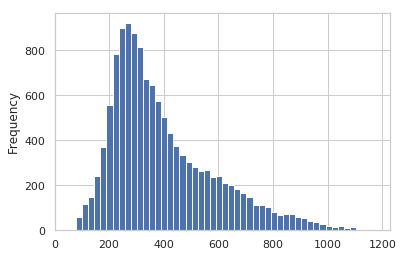

In [106]:
df2014_mo_merged_nodental['IndividualRate'].plot.hist(50)

Calculating  the median of this asymmetric distribution

In [107]:
df2014_mo_merged_nodental['IndividualRate'].median()

343.015

**Observation 7** The median monthly premium in 2014 in Montana was about $340. That's a reasonable number!

##  Data Cleaning Phase Completed.Actual Analysis Phase

Breaking the whole dataset down by year to see some trends on the individual types of rates.

Reading the cleaned dataframes

In [0]:
df2014 = pd.read_csv("Rates2014.csv")
df2015 = pd.read_csv("Rates2015.csv")
df2016 = pd.read_csv("Rates2016.csv")

In [109]:
df2014.describe()

,Unnamed: 0,BusinessYear,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,2.370659e+06,2370659.0,2.370659e+06,1.601995e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.870614e+06,2014.0,4.524658e+02,5.601592e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.066630e+06,0.0,2.468284e+02,3.345296e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.398000e+03,2014.0,4.907000e+01,5.566000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.055422e+06,2014.0,2.902200e+02,3.412000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.815117e+06,2014.0,3.872100e+02,4.759600e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.754092e+06,2014.0,5.610200e+02,6.953100e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3.656258e+06,2014.0,5.503850e+03,6.604610e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation 8** All the couple and family rates were dental-only plans. Maybe that was clear to anyone else. 

In [110]:
df2014.median(numeric_only=True)

Unnamed: 0                                   1815117.00
BusinessYear                                    2014.00
IndividualRate                                   387.21
IndividualTobaccoRate                            475.96
Couple                                              NaN
PrimarySubscriberAndOneDependent                    NaN
PrimarySubscriberAndTwoDependents                   NaN
PrimarySubscriberAndThreeOrMoreDependents           NaN
CoupleAndOneDependent                               NaN
CoupleAndTwoDependents                              NaN
CoupleAndThreeOrMoreDependents                      NaN
dtype: float64

Comparing smoker and non-smoker rates then! We can start with simple statistics such as median, mean and standard deviation

In [0]:
dfmedian2014 = df2014[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmedian2015 = df2015[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmedian2016 = df2016[['IndividualRate','IndividualTobaccoRate']].median(numeric_only=True)
dfmean2014 = df2014[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfmean2015 = df2015[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfmean2016 = df2016[['IndividualRate','IndividualTobaccoRate']].mean(numeric_only=True)
dfstd2014 = df2014[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
dfstd2015 = df2015[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)
dfstd2016 = df2016[['IndividualRate','IndividualTobaccoRate']].std(numeric_only=True)

Combining these statistics in dataframes. This will enable us to plot them conveniently with Pandas and Seaborn.

In [112]:
dfmedians = pd.concat([dfmedian2014,dfmedian2015,dfmedian2016], keys=['2014', '2015', '2016'], axis=1)
dfmeans = pd.concat([dfmean2014,dfmean2015,dfmean2016], keys=['2014', '2015', '2016'], axis=1)
dfstd = pd.concat([dfstd2014,dfstd2015,dfstd2016], keys=['2014', '2015', '2016'], axis=1)
dfstd

,2014,2015,2016
IndividualRate,246.828415,229.156813,237.808886
IndividualTobaccoRate,334.529592,272.904169,272.979168


The standard deviation of the plan rates is quite high, and it's not really what I was interested in. We want to compare the medians of the plan rates for different categories. I would like to know how sensitive this statistic is to the sampling of the distribution function of plan rates. We can estimate that with bootstrapping:  

We can use these uncertainties now to see if there has been a significant increase in the median prize rates between 2014 and 2016.

<Figure size 432x432 with 0 Axes>

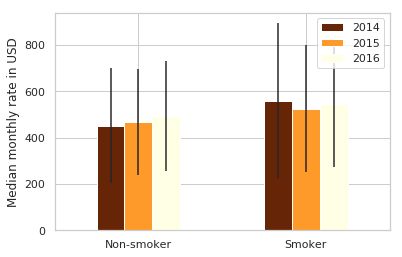

In [113]:
fig = plt.figure(figsize=(6, 6))

ax = dfmeans.plot.bar(yerr=dfstd, rot=0, colormap='YlOrBr_r')
ax.set_ylabel("Median monthly rate in USD")
ax.set_xlabel("")

# Customize x tick lables
labels = ['Non-smoker', 'Smoker']
xticks = [0,1]
ax.xaxis.set_ticks(xticks)
ax.set_xticklabels(labels)

plt.savefig('Overall_rates.png', bbox_inches='tight', dpi=150)

**Observation 9** There has been a significant increase in premiums for non-smokers in the years 2014-2016. In the same period, the median rates for smokers remained roughly constant. 

Let us look at the individual rates for each of the three years broken down by states. Did the prizes go up in all of the states?

In [0]:
Statelist = df['StateCode'].unique()
Statelist = np.sort(Statelist)

2016 first. We can use Seaborn's barplot to show the data for the 38 states. It offers us the possibility to select an estimator for a quanity that we want to compare across categories (which we can set to numpy's median) and even includes a bootstrapping routine like the one we used above.

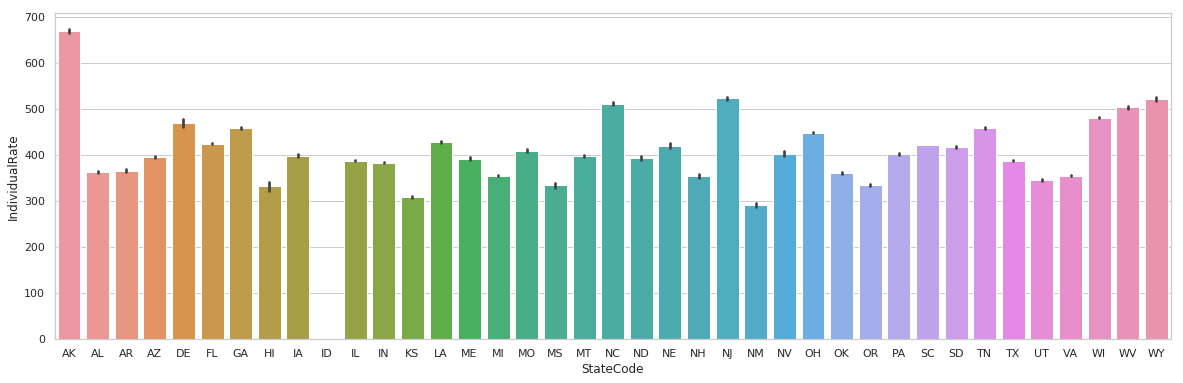

In [115]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2016['StateCode'], y=df2016['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

**Observation 10** median health insurance rates for non-smokers (and smokers as well) vary strongly between the states that participated in the health insurace marketplace.

Let's also look at the other years. 2015:

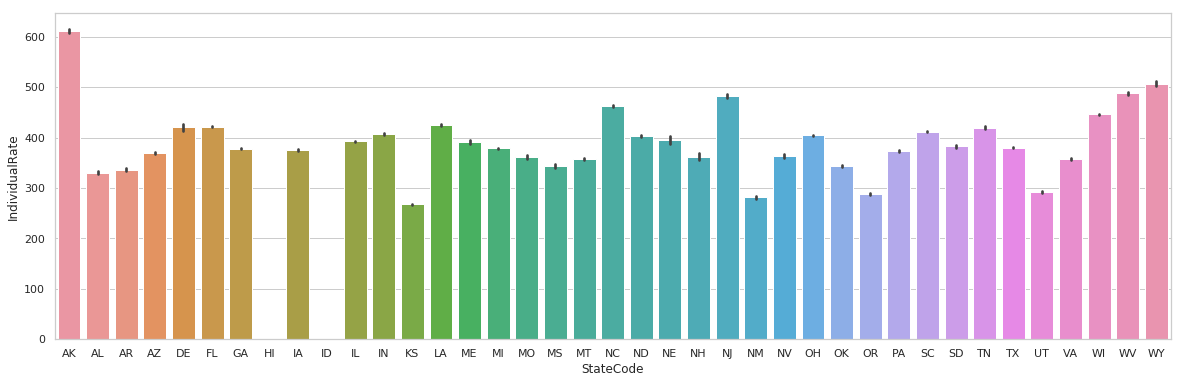

In [116]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2015['StateCode'], y=df2015['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

2014:

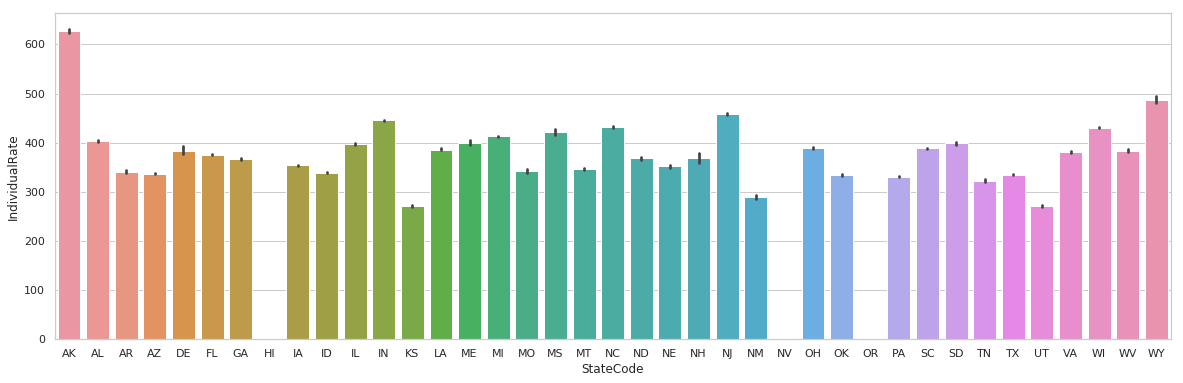

In [117]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df2014['StateCode'], y=df2014['IndividualRate'], order=Statelist, estimator=np.median, ci=95, n_boot=1000)

**Observation 11** Not all states participated in the federal health insurance marketplace in all three years. 

Other than that, these three plots don't tell us much. We can combine all of them into one figure to see how the median rates changed with the years.

In [0]:
df = pd.concat([df2014,df2015,df2016])

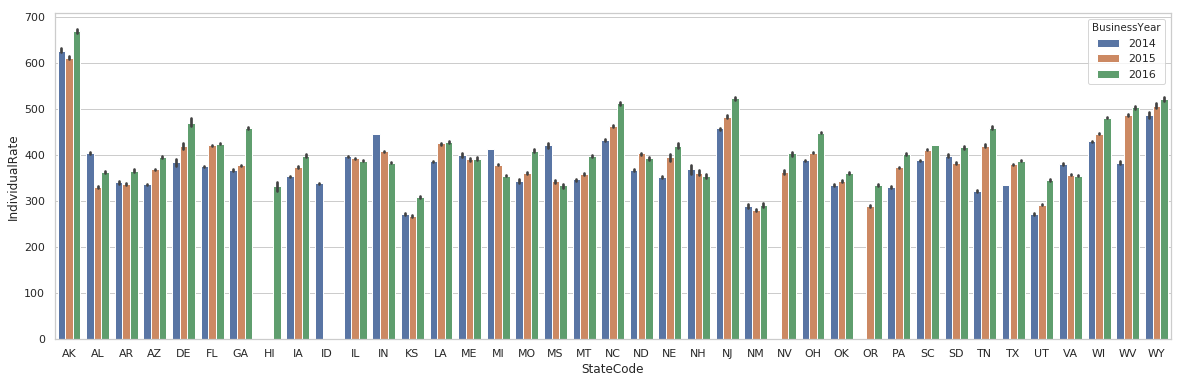

In [119]:
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")
sns.barplot(x=df['StateCode'], y=df['IndividualRate'], hue=df['BusinessYear'], order=Statelist, estimator=np.median, ci=95, n_boot=100)

**Observation 12** Median plan rates significantly increased for about 25 states that participated in the marketplace between 2014 and 2016. A decrease can be observed in about 8 states.

Making  a sorted comparison plot of median, non-smoker plan rates across all states that participated in the program.

In [0]:
Statelist = df['StateCode'].unique()
State_medians = [] 
for state in Statelist:
    State_medians.append(np.median(df[df['StateCode'].isin([state])].IndividualRate))

First we make a list of the states in the dataset.

In [121]:
Statelist

array(['AK', 'AL', 'AZ', 'FL', 'GA', 'IN', 'LA', 'MO', 'MS', 'NC', 'ND',
       'NJ', 'OK', 'PA', 'SC', 'TN', 'TX', 'WI', 'WY', 'AR', 'DE', 'IL',
       'KS', 'ME', 'MI', 'MT', 'NH', 'NM', 'VA', 'WV', 'IA', 'ID', 'NE',
       'OH', 'SD', 'UT', 'NV', 'OR', 'HI'], dtype=object)

Then we add the median plan rates as a second column.

In [122]:
Statelist_ordered_by_rate = np.column_stack((np.asarray(Statelist), State_medians))
Statelist_ordered_by_rate

array([['AK', 632.76],
       ['AL', 373.33],
       ['AZ', 359.38],
       ['FL', 408.21],
       ['GA', 416.78],
       ['IN', 430.35],
       ['LA', 414.675],
       ['MO', 377.56],
       ['MS', 359.505],
       ['NC', 468.35],
       ['ND', 392.185],
       ['NJ', 495.65999999999997],
       ['OK', 345.22],
       ['PA', 359.9],
       ['SC', 414.52],
       ['TN', 405.03499999999997],
       ['TX', 367.06],
       ['WI', 455.63],
       ['WY', 509.5],
       ['AR', 347.705],
       ['DE', 434.2],
       ['IL', 392.52],
       ['KS', 280.685],
       ['ME', 393.37],
       ['MI', 387.505],
       ['MT', 368.605],
       ['NH', 358.175],
       ['NM', 286.33],
       ['VA', 364.55],
       ['WV', 477.62],
       ['IA', 368.19],
       ['ID', 338.94],
       ['NE', 372.915],
       ['OH', 416.3],
       ['SD', 396.305],
       ['UT', 300.53],
       ['NV', 384.695],
       ['OR', 308.0],
       ['HI', 332.29]], dtype=object)

This array we can sort by the premiums.

In [0]:
Statelist_ordered_by_rate = Statelist_ordered_by_rate[Statelist_ordered_by_rate[:, 1].argsort()]

Which we can then use as labels for our ordered plot.

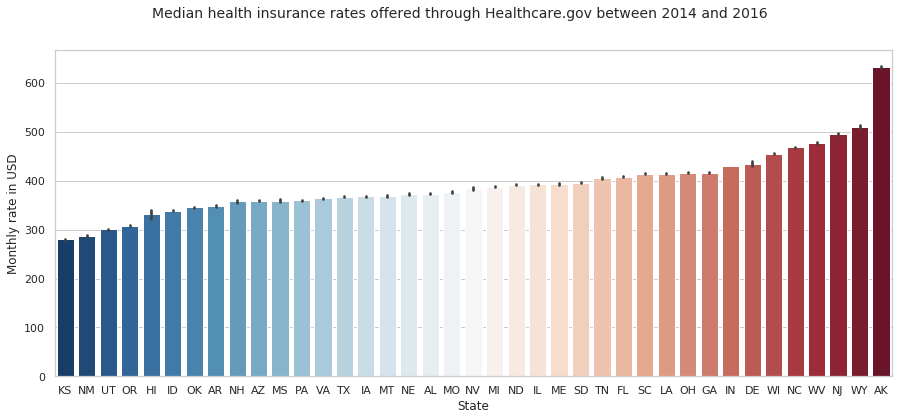

In [124]:
fig = plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

fig.suptitle('Median health insurance rates offered through Healthcare.gov between 2014 and 2016', fontsize=14)

ax = sns.barplot(x=df['StateCode'], y=df['IndividualRate'], order=Statelist_ordered_by_rate[:,0], estimator=np.median, ci=95, n_boot=100, palette="RdBu_r")
ax.set_ylabel("Monthly rate in USD")
ax.set_xlabel("State")

plt.savefig('Median_rates_by_state.png', bbox_inches='tight', dpi=150)

**CONCLUSION:**

Health insurance for non-smoking individuals is cheapest in Kansas and most expensive in Alaska. The median rate is about twice as high in Alaska as it is in Kansas, New Mexico, Utah, Oregon or Hawaii.

## Data Preparation for Naive Bayes

In [0]:
def mapRateAreaID(df):
    rate_area_id = df['RatingAreaId'].unique().tolist()
    mapping = dict( zip(rate_area_id,range(len(rate_area_id))) )
    df.replace({'rate_area_id': mapping},inplace=True)

    RateAreaCode = []
    for row in df['RatingAreaId']:
        try:
            RateAreaCode.append(mapping[row.strip()])
        except:
            RateAreaCode.append(1)
    df['RateAreaCode'] = RateAreaCode
    
mapRateAreaID(df)

In [0]:
def mapTobaccoUser(df):
    tobacco_user = df['Tobacco'].unique().tolist()
    mapping = dict( zip(tobacco_user,range(len(tobacco_user))) )
    df.replace({'tobacco_user': mapping},inplace=True)

    TobaccoUser = []
    for row in df['Tobacco']:
        try:
            TobaccoUser.append(mapping[row.strip()])
        except:
            TobaccoUser.append(1)
    df['TobaccoUser'] = TobaccoUser
    
mapTobaccoUser(df)

In [127]:
df.dropna(subset = ['RateAreaCode', 'TobaccoUser'], inplace = True)
print(df.shape)
df.head(20)

(7662913, 20)


,Unnamed: 0,BusinessYear,StateCode,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,HIOSProductId,DentalOnlyPlan,RateAreaCode,TobaccoUser
0,1398,2014,AK,73836AK0620001,Rating Area 1,No Preference,0-20,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0
1,1399,2014,AK,73836AK0620001,Rating Area 1,No Preference,21,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0
2,1400,2014,AK,73836AK0620001,Rating Area 1,No Preference,22,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0
3,1401,2014,AK,73836AK0620001,Rating Area 1,No Preference,23,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0
4,1402,2014,AK,73836AK0620001,Rating Area 1,No Preference,24,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0
5,1403,2014,AK,73836AK0620001,Rating Area 1,No Preference,25,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0
6,1404,2014,AK,73836AK0620001,Rating Area 1,No Preference,26,231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0
7,1405,2014,AK,73836AK0620001,Rating Area 1,No Preference,27,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0
8,1406,2014,AK,73836AK0620001,Rating Area 1,No Preference,28,245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0
9,1407,2014,AK,73836AK0620001,Rating Area 1,No Preference,29,252.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73836AK062,No,0,0


In [0]:
df = df.head(100000).reset_index(drop=True)

**Splitting the dataset for train and test models**

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import train_test_split

# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(df[['RateAreaCode']], df['TobaccoUser'], test_size=0.1, random_state=69)

In [130]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90000, 1)
(90000,)
(10000, 1)
(10000,)


**Define the Gaussian Naive Bayes Model**

In [131]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Apply Prediction on the test dataset**

In [0]:
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

**Accuracy of Naive Bayes Model**

In [133]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 94.32000000000001


**Conclusion**

Naive Bayes Classifier is used for classification tasks. With the current solution we used the Gaussian Naive Bayes classification task, which classifies the insurance rate categories for the user based depending on a smoker or non-smoker individual with an accuracy of 94.32%.